**Outline**

1. Topic Review
2. Case 1 - Kid Score vs. Mom Background
3. Case 2 - Medical Charges

- We need to import library and function that need to run the code in this notebook to:
  - load data
  - doing simulation
  - drawing graph and other visualization

In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# modelling
import statsmodels.formula.api as smf

# statistics
import scipy.stats as stats

In [2]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from
    :return df: <pandas DataFrame>
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

## **Topic Review**
---

- Simple Linear Regression allow us to reveal the realtionship between the outcome and a predictor
- However, in real life cases we often face the problem where we want to know relationship with more than one variable.
- Thus, we can use multiple predictors in linear regression model

$$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + ... +\beta_kx_k$$

- The interpretation of the slope in linear regression with multiple predictor is comparison of individual that differ in one predictor while holding the other at same levels.
- The predictive interpretation of coefficient: how the outcome variable differs, on average, when comparing two groups of items that differ by 1 in the relevant predictor while set the same in all the other predictors

- We need to use interaction for predictors that have large coefficients when not interacted. Including interactions is a way to allow a model to be fit differently to different subsets of data.

## Linear Regression with Multiple Predictors 1

## **Case 1 - Kid Score vs. Mom Background**
---

- Given data of children’s test scores given other variables about their mom.
- If we want to predict the kid’s score by an the iq, we can use simple linear regression
- First, we need to load the data

### Load Data

In [4]:
kidiq = pd.read_csv("kid_iq.csv")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


- Visualize kid_score and mom_iq to detect whether there's a potential unique pattern

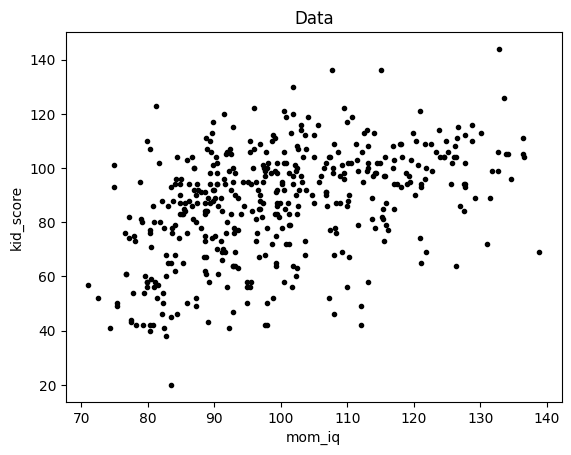

In [5]:
import matplotlib.pyplot as plt

x = kidiq["mom_iq"]
y = kidiq["kid_score"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("mom_iq")
plt.ylabel("kid_score")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

### Fit Linear Regression - Using a Continuous Variable
- Build the model using ols

In [6]:
# Create OLS model object
model = smf.ols("kid_score ~ mom_iq", kidiq)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_kidiq = print_coef_std_err(results)

- Visualize the data and the regression line

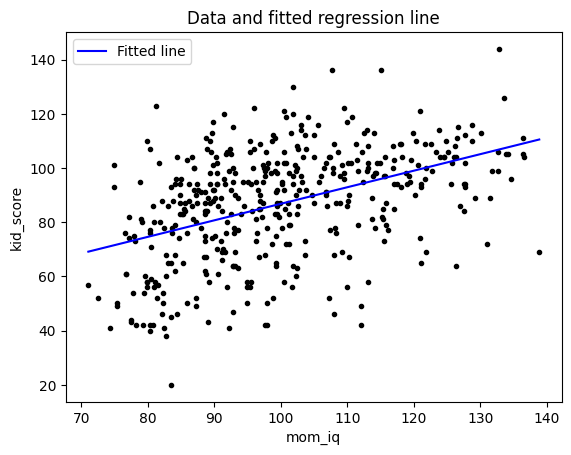

In [7]:
predictor = "mom_iq"
outcome = "kid_score"
data = kidiq.copy()
results_ = results_kidiq.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("kid_score")
plt.xlabel("mom_iq")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation *italicized text*
- Now we read the result of the model, and interpret each coefficient


In [8]:
results_kidiq

,coef,std err
Intercept,25.799778,5.917412
mom_iq,0.609975,0.058521


$$\text{kid_score} = 26 + 0.6\text{mom_iq}$$
- the average kid_score whose mothers have 0 mom_iq is `26`. It doesn't make sense since no mom one have 0 iq
- As a result, we can write another equivalent equation by using the average of kid_score and mom_iq


In [9]:
np.mean(kidiq["kid_score"])

86.79723502304148

In [10]:
np.mean(kidiq["mom_iq"])

99.99999999999999

  $$\text{kid_score} = 86.8 + 0.6(\text{mom_iq}-100)$$
- So the interpretation would be, the average kid_score whose mothers have average mom_iq is `86.8`

- Next, the interpretation of coefficient in mom_iq is, the difference in kid_score between two childred whose their mother have one point different in iq, is `0.6`, with the kid whose mother have higher iq have the higher score
### Fit Linear Regression - Using a Binary Variable
- Next, how if we want to predict the kid’s score by an indicator for whether the mother graduated from high school or not?
- Build simple linear regression with mom_hs as predictor

In [11]:
# Create OLS model object
model = smf.ols("kid_score ~ mom_hs", kidiq)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_kidhs = print_coef_std_err(results)

- Visualize the data and regression line

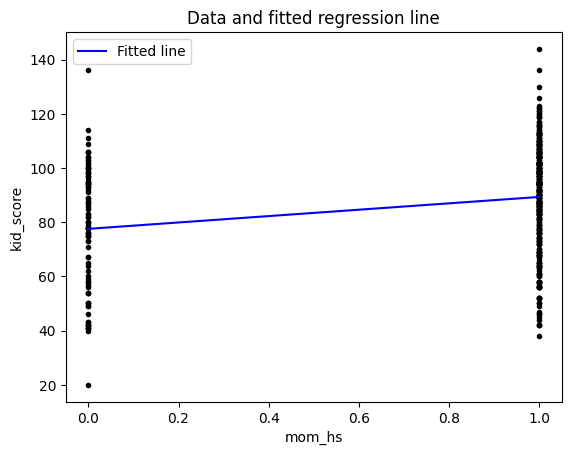

In [12]:
predictor = "mom_hs"
outcome = "kid_score"
data = kidiq.copy()
results_ = results_kidhs.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("kid_score")
plt.xlabel("mom_hs")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

###  Coefficient Interpretation



In [13]:
results_kidhs

,coef,std err
Intercept,77.548387,2.058612
mom_hs,11.771261,2.322427


$$\text{kid_score} = 78 + 12\text{mom_hs}$$
- The average kid_score whose mothers did not complete high school is `78`.
- Next, the interpretation of coefficient in mom_hs is, the difference in kid_score between two childred whose mothers complete high school have 12 higher score on average than children whose mothers did not complete high school

### Fit Linear Regression - Include Both Variables
- Now, We want to predict kid score from both maternal IQ and an indicator for whether the mother graduated from high school or not
- Use `+` to add another predictors in the model



In [14]:
# Create OLS model object
model = smf.ols("kid_score ~ mom_iq + mom_hs", kidiq)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_kid_iqhs = print_coef_std_err(results)

### Coefficient Interpretation

In [15]:
results_kid_iqhs

,coef,std err
Intercept,25.731538,5.875208
mom_iq,0.563906,0.060574
mom_hs,5.950117,2.211812


$$\text{kid_score} = 26 + 0.6\text{mom_hs} + 0.6\text{mom_iq}$$

- The model predict child’s test score whose mother have 0 in IQ and did not complete high school is `26`
- The coefficient of maternal high school completion: If we compare children test score whose mothers have the same IQ but differed in completed high school, the expected difference of their score is 6
- The coefficient of maternal IQ: If we compare children test score whose mothers have the same in high school completion but differed 1 point in IQ, the expected difference of their score is 0.6


- We can visualize the model with one continuous and one binary predictor simply by ploting two lines belong to each subpopulation based on value in the binary predictor
- In kidiq data, we plot *two lines* represents the regression line of the children whose mother `did not complete the high school` and the other regression line of the children whose mother `complete the high school`


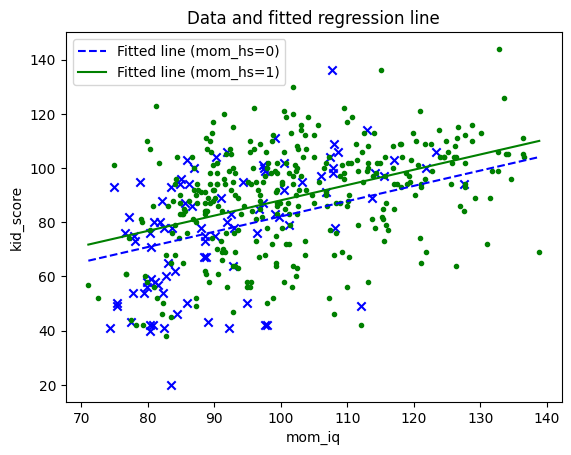

In [16]:
predictors = ["mom_iq","mom_hs"]
outcome = "kid_score"
data = kidiq.copy()
results_ = results_kid_iqhs.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i],
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (mom_hs={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- From the figure, the slope in regression model of child’s test score on mother’s IQ was required to be identical across subgroups defined by the mother's high school completion.
- However, if we look the data in figure, it suggests that the slopes differ substantially
- To address this, include an interaction between mom_hs and mom_iq, resulting in a new predictor defined as the product of these two variables.
- This will permits the slope to differ between subgroups.

### Fit Linear Regression - Include an Interaction

In [17]:
# Create OLS model object
model = smf.ols("kid_score ~ mom_iq + mom_hs + mom_hs:mom_iq", kidiq)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_kid_iqhs_inter = print_coef_std_err(results)

- Visualize the data and regression line

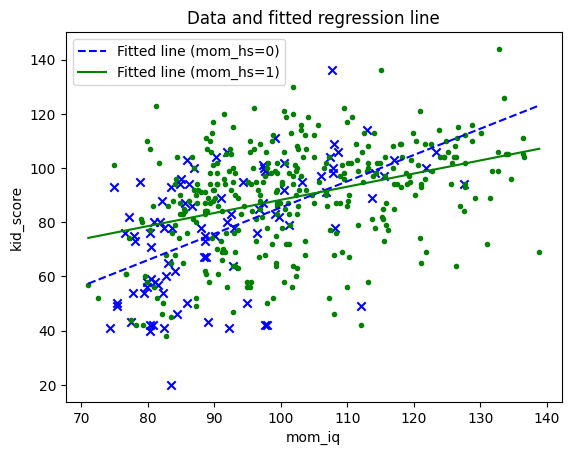

In [18]:
predictors = ["mom_iq","mom_hs","mom_hs:mom_iq"]
outcome = "kid_score"
data = kidiq.copy()
results_ = results_kid_iqhs_inter.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : "x", 1: "."}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (mom_hs={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The slope differ between the two groups in the model that include interaction
### Coefficient Interpretation

In [19]:
results_kid_iqhs_inter

,coef,std err
Intercept,-11.482021,13.757974
mom_iq,0.968889,0.148344
mom_hs,51.268223,15.337581
mom_hs:mom_iq,-0.484275,0.162217


$$\text{kid_score} = -11 + \text{mom_iq} + 51\text{mom_hs} - 0.5\text{mom_iq}*\text{mom_hs}$$

- The intercept represents the average test scores for children whose mothers did not complete high school and had IQs of 0—not a meaningful scenario, we can discuss later to centering the predictor to interpret this better

- The coefficient of mom_hs, 51: The difference between the predicted test scores for
  - children whose mothers had IQs of 0 and did not complete high school, and
  - children whose mothers had IQs of 0 and did complete high school.
  This coefficient is not easily interpretable
  
- The coefficient of mom_iq, 1: The comparison of average test scores across children whose mothers did not complete high school, but differ by 1 point in IQs. *This is the slope of the blue line*

- the coefficient on the interaction term, -0.5 : represents the difference in the slope for mom_iq, comparing children with mothers who did and did not complete high school. *It’s, the difference between the slopes of the green and blue lines*

Or you can simply write that

$$\text{mom_hs}=0, \text{kid_score} = -11 + \text{mom_iq}$$
- The estimated difference between child score whose mothers did not complete high school but differ 1 point in iq is 1


$$\text{mom_hs}=1, \text{kid_score} = 40 + 0.5\text{mom_iq}$$
- The estimated difference between child score whose mothers who did complete high school but differ 1 point in iq is 0.5

## **Case 2 - Charges vs BMI**
---
- Let's continue exploring Insurance Data
- Here, we have personal insurance data that record medical charge in each person
- We want to know more than just the relationship between `smoker` and medical charges (`charges`), we have other variable that hypothetically related to charges.
- First, assume we want to know how the `bmi` variable relate to medical `charges`
### Load Data

In [21]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Check the pattern in bmi and charges variables in charges using visualization

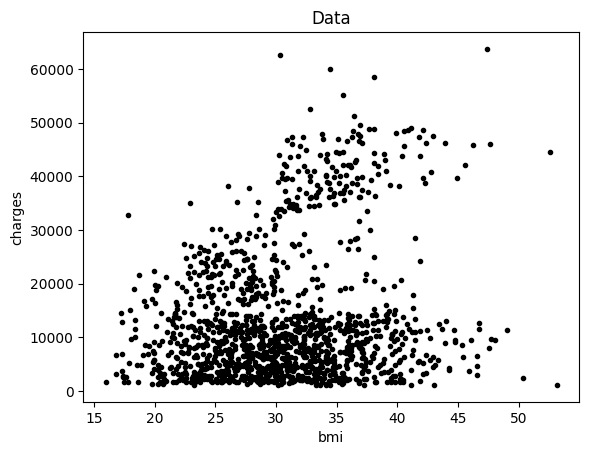

In [22]:
x = insurance['bmi']
y = insurance['charges']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("bmi")
plt.ylabel("charges")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- From the visualization itself, we see two group-like cluster, we will explore it later
- How the regression look like when we build the model using only bmi?

### Fit Linear Regression



In [23]:
# Create OLS model object
model = smf.ols('charges ~ bmi', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bmi_charges = print_coef_std_err(results)

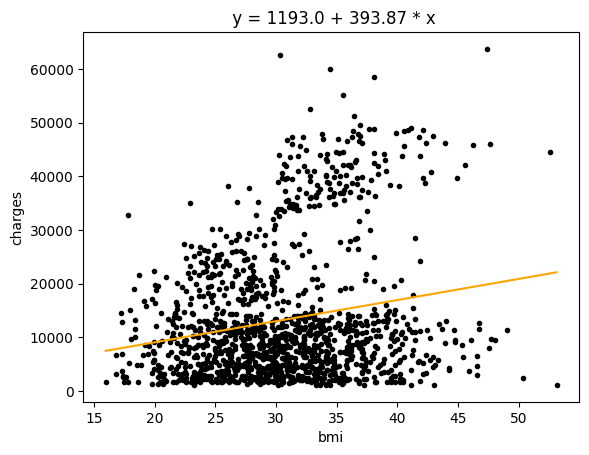

In [24]:
predictor = "bmi"
outcome = "charges"
data = insurance.copy()
results_ = results_bmi_charges.copy()

# scatter-plot data
x = insurance['bmi']
y = insurance['charges']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "orange")

plt.ylabel("charges")
plt.xlabel("bmi")
plt.title(f" y = {np.round(a_hat)} + {np.round(b_hat, 2)} * x")

plt.show()

- The simple regression line with one predictor seems do not quite tell the relationship happened in the data since it doesn't tell what's really going on with the *two groups look like cluster*
- Let's explore if other variable can help us tells what's going on in our data

BMI and Sex vs. Charges

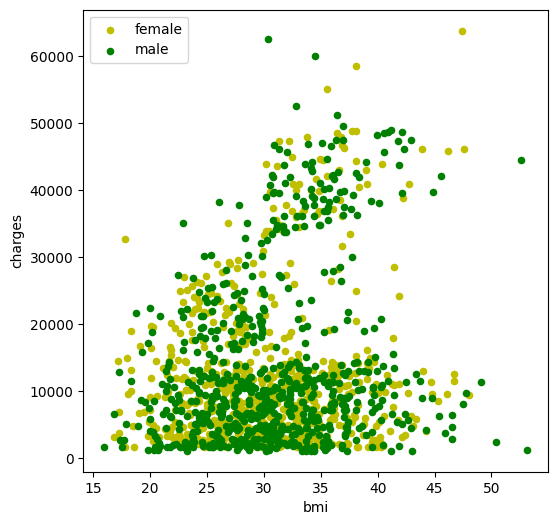

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

# Define different color for each group data
colors = {"female":"y","male":"g"}

grouped = insurance.groupby('sex')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key])
plt.show()

BMI and Smoker vs. Charges

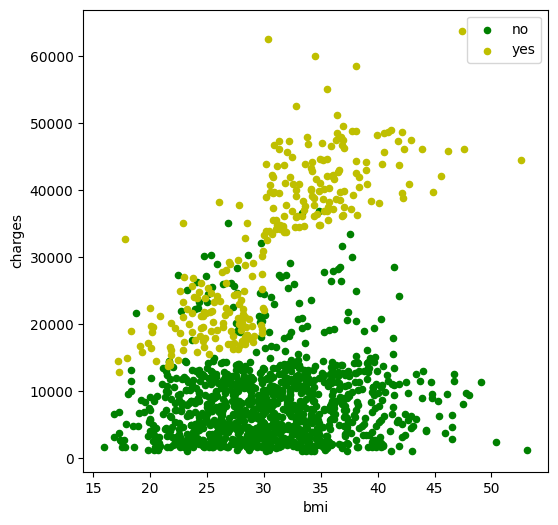

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))

# Define different color for each group data
colors = {"yes":"y","no":"g"}

grouped = insurance.groupby('smoker')

# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key])
plt.show()

In [27]:
insurance["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


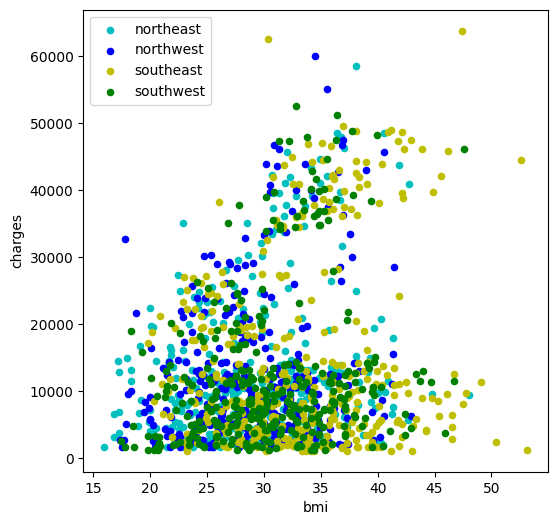

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))

# Define different color for each group data

colors = {"southeast":"y","southwest":"g", "northwest":"b","northeast":"c"}

grouped = insurance.groupby('region')
# Plot the data with different color
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='bmi', y='charges', label=key, color=colors[key])
plt.show()

- From the visualization, we see that variable `smoker` can differentiate the data in charges values
- Next, try to add the `smoker` variable in the regression model to get more interpretable result

- Do simple preprocessing to convert the smoker that contain string "yes" and "no" to binary (1 for "yes", 0 for "no") to do numerical calculation in more convenient way in ols and displaying fitted regression line

In [29]:
# Use LabelEncoder to convert the smoker variable into numeric
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the smoker variable
insurance["smoker"] = LabelEncoder().fit_transform(insurance["smoker"])

# Display the 5th first row after transforming
insurance[["smoker","charges"]].head()

,smoker,charges
0,1,16884.92400
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520


### Fit Linear Regression - Include Both Variables


In [30]:
# Create OLS model object
model = smf.ols('charges ~ bmi + smoker', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bmi_smoker_charges = print_coef_std_err(results)

- Visualize the data and regression line

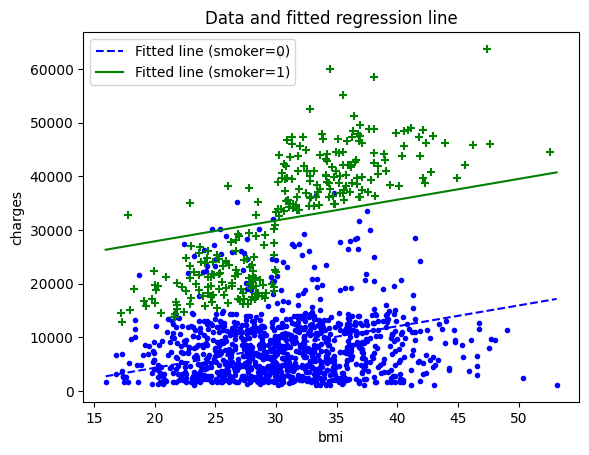

In [31]:
predictors = ["bmi","smoker"]
outcome = "charges"
data = insurance.copy()
results_ = results_bmi_smoker_charges.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "+"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i],
                marker = markers[i])

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (smoker={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- The regression line after including `smoker` variable seems tell the relationship belong to each subpopulation based on value in the `smoker` predictor
- However, it still have the same slopes, contrasting the pattern in the data that suggests that the slopes differ substantially
- Include interation in smoker and bmi to address the issue
### Fit Linear Regression - Include an Interaction

In [32]:
# Create OLS model object
model = smf.ols('charges ~ bmi + smoker + smoker:bmi', insurance)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_bmi_smoker_inter_charges = print_coef_std_err(results)

- Visualize the data and regression line

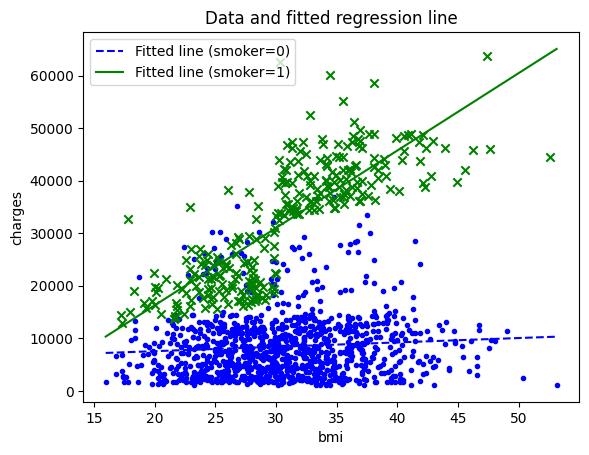

In [33]:
predictors = ["bmi","smoker","smoker:bmi"]
outcome = "charges"
data = insurance.copy()
results_ = results_bmi_smoker_inter_charges.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "x"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome],
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (smoker={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

- Finally we have the regression line that can tell the two groups of data have different slopes
### Coefficient Interpretation

In [34]:
results_bmi_smoker_inter_charges

,coef,std err
Intercept,5879.424082,976.869062
bmi,83.350558,31.268538
smoker,-19066.000405,2092.028210
smoker:bmi,1389.755697,66.782972


$$\text{charges} = 5880 + 83\text{bmi} -19066\text{smoker} + 1390\text{smoker*bmi}$$

- Interpret the model by substitute each value in smoker

$$\text{smoker}=0, \text{ charges} = 5880 + 83\text{bmi}$$
- The estimated difference between charges whose people who did not smoke but differ 1 point in bmi is 83


$$\text{smoker}=1, \text{ charges} = -13186 + 1473\text{bmi}$$
- The estimated difference between charges whose people who did smoke but differ 1 point in bmi is 1390

The model that include interaction may seems prety difficult to interpret, but this model can efficiently tell us the relationship between subgroups in the data

## Reference and Dataset Source
- [Kaggle: Insurance Dataset](https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset)